In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from figure_formatting import figure_formatting as ff
ff.formatting['axes.linewidth'] = 0.5
ff.formatting['lines.linewidth'] = 1.0
ff.set_formatting()

from matplotlib.ticker import MultipleLocator

In [2]:
cubic_data = pd.read_csv('../Data/TiOF2 fit PDF cubic model.csv', sep='\s+')
cubic_data

,r,calc,exp,diff
0,1.00,-0.57137,-0.64940,-0.07802
1,1.01,-0.64141,-0.66337,-0.02196
2,1.02,-0.70964,-0.68571,0.02393
3,1.03,-0.77503,-0.71607,0.05896
4,1.04,-0.83663,-0.75379,0.08284
...,...,...,...,...
3896,39.96,-0.12859,-0.16723,-0.03864
3897,39.97,-0.22525,-0.25917,-0.03392
3898,39.98,-0.32261,-0.35181,-0.02920
3899,39.99,-0.41991,-0.44455,-0.02464


In [3]:
# fig = plt.figure(figsize=(3.15,2.5))
# plt.plot(cubic_data.r, cubic_data.exp)
# plt.plot(cubic_data.r, cubic_data.calc)
# plt.plot(cubic_data.r, cubic_data['diff'])
# plt.xlim([1.0, 8.0])
# plt.show()

In [4]:
colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51'}

In [5]:
def plot_PDF_data(data, filename):
    fig, (ax1, ax2) = plt.subplots(nrows=2,
                                   sharex=True,
                                   gridspec_kw={'height_ratios': [3, 1],
                                                'hspace': 0.0},
                                   figsize=(3.55, 2.25))
    ax1.set_ylim(-7.5, +5)

    ax2.plot(data.r, data['diff'], color='grey')
    ax2.set_ylim(-4, +4)
    ax2.set_yticks([-3, 0, +3])
    ax1.set_yticks([-5, 0.0, 5.0])
    ax1.set_xlim([1.0, 8.0])
    ax2.set_xlabel("$r$ / $\AA$")
    ax2.set_ylabel("diff / $\AA^2$")
    ax1.set_ylabel("G / $\AA^2$")
    ax1.vlines(1.71, -7.5, -0.1, color=colors['dark orange'], linewidth=0.75, linestyle='dashed')
    ax1.vlines(1.94, -7.5, 4.9, color=colors['blue'], linewidth=0.75, linestyle='dashed')
    ax1.vlines(3.55, -7.5, -1, color=colors['dark orange'], linewidth=0.75, linestyle='dashed')
    ax1.vlines(3.93, -7.5, 4, color=colors['blue'], linewidth=0.75, linestyle='dashed')
    ax1.plot(data.r[0:702], data.exp[0:702], label="exp", marker='o', 
             linestyle="none", markersize=2, color=colors['light orange'], markeredgewidth=0.0, clip_on=False)
    ax1.plot(data.r[0:702], data.calc[0:702], label="calc", color=colors['green'], linewidth=1, clip_on=False)
    ax1.spines[['right', 'top']].set_visible(False)
    ax2.text(1.095, 4.75,"Ti–O", color="white", bbox=dict(boxstyle='square,pad=0.2', fc=colors['dark orange'], ec='none'))
    ax2.text(2.85, 4.75,"Ti–O–Ti", color="white", bbox=dict(boxstyle='square,pad=0.2', fc=colors['dark orange'], ec='none'))
    ax2.text(1.98, 4.75,"Ti–F", color="white", bbox=dict(boxstyle='square,pad=0.2', fc=colors['blue'], ec='none'))
    ax2.text(3.965, 4.75,"Ti–F–Ti", color="white", bbox=dict(boxstyle='square,pad=0.2', fc=colors['blue'], ec='none'))
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.patch.set_alpha(0.0)
    ax1.legend(loc=(0.8,0.0), numpoints=7)
    ax1.yaxis.set_minor_locator(MultipleLocator(2.5))
    ax1.tick_params(width=0.5)
    ax2.tick_params(width=0.5)
    plt.savefig(filename)
    plt.show()

In [6]:
dft_data = pd.read_csv('../Data/TiOF2 fit PDF DFT model.csv', sep='\s+', na_values="--")
dft_data

,r,exp,calc,diff
0,1.00,-0.649396,-0.521819,-0.127577
1,1.01,-0.663366,-0.593109,-0.070257
2,1.02,-0.685710,-0.664977,-0.020733
3,1.03,-0.716068,-0.736269,0.020201
4,1.04,-0.753785,-0.805812,0.052027
...,...,...,...,...
696,7.96,0.988802,1.195400,-0.206598
697,7.97,0.844287,1.056980,-0.212693
698,7.98,0.695646,0.911347,-0.215701
699,7.99,0.543948,0.759098,-0.215150


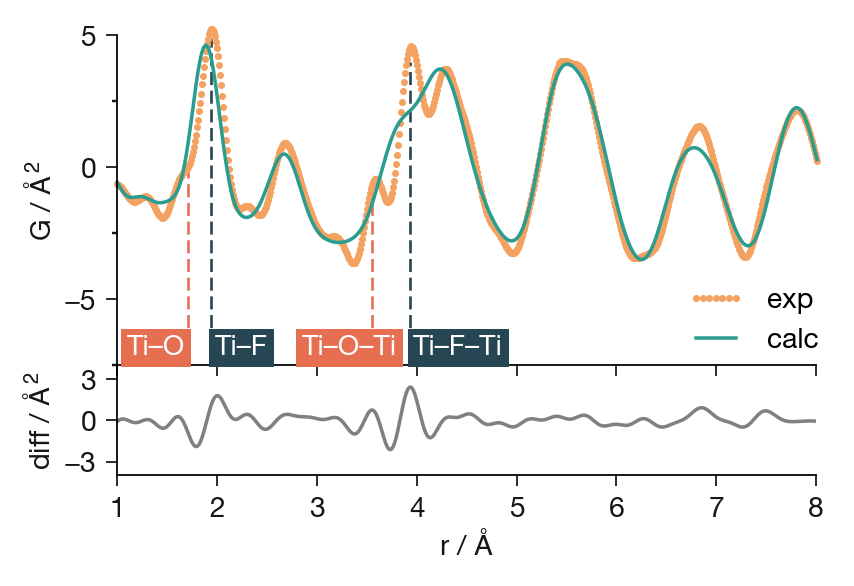

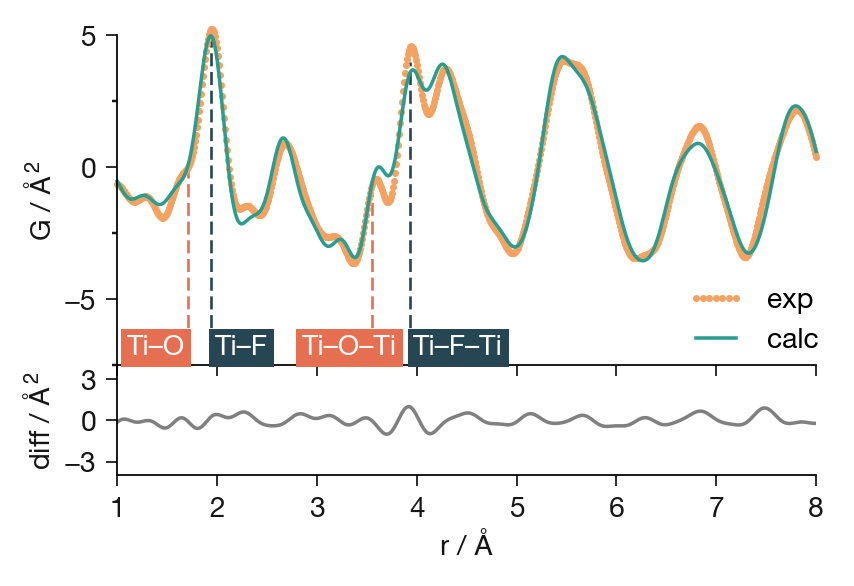

In [7]:
plot_PDF_data(data=cubic_data, filename='../Figures/PDF_short_distance_comparison.pdf')
plot_PDF_data(data=dft_data, filename='../Figures/PDF_DFT_comparison.pdf')

In [8]:
long_range_data = pd.read_excel('../Data/FigS2.xls')
long_range_data

,r,Calc,Exp,r.1,Diff
0,1.00,-0.571373,-0.649396,1.00,-0.078023
1,1.01,-0.641409,-0.663366,1.01,-0.021957
2,1.02,-0.709640,-0.685710,1.02,0.023930
3,1.03,-0.775029,-0.716068,1.03,0.058961
4,1.04,-0.836625,-0.753785,1.04,0.082840
...,...,...,...,...,...
3896,39.96,-0.128589,-0.167230,39.96,-0.038641
3897,39.97,-0.225253,-0.259170,39.97,-0.033917
3898,39.98,-0.322606,-0.351807,39.98,-0.029201
3899,39.99,-0.419906,-0.444550,39.99,-0.024644


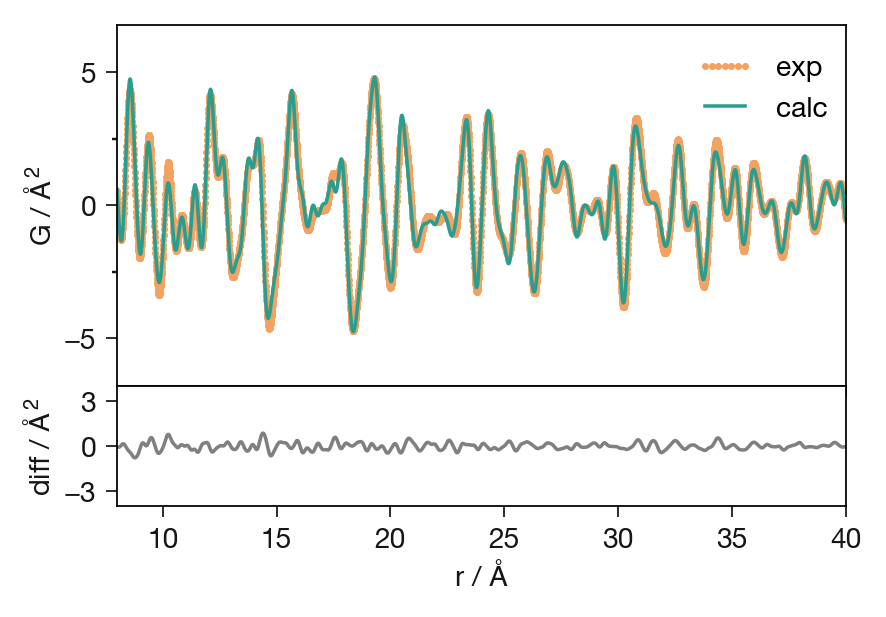

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2,
                                   sharex=True,
                                   gridspec_kw={'height_ratios': [3, 1],
                                                'hspace': 0.0},
                                   figsize=(3.55, 2.50))
ax1.plot(long_range_data['r'], long_range_data['Exp'], marker='o', 
             linestyle="none", markersize=2, color=colors['light orange'], markeredgewidth=0.0, label="exp")
ax1.plot(long_range_data['r'], long_range_data['Calc'], label="calc", color=colors['green'], linewidth=1)
ax1.set_xlim(8,40)
ax1.set_ylim(-6.8, +6.8)
ax2.plot(long_range_data.r, long_range_data['Diff'], color='grey')
ax2.set_ylim(-4, +4)
ax2.set_yticks([-3, 0, +3])
ax1.set_yticks([-5, 0.0, 5.0])
ax1.legend(loc=(0.78,0.7), numpoints=7)
ax1.yaxis.set_minor_locator(MultipleLocator(2.5))
ax1.tick_params(width=0.5)
ax2.tick_params(width=0.5)
ax2.set_xlabel("$r$ / $\AA$")
ax2.set_ylabel("diff / $\AA^2$")
ax1.set_ylabel("G / $\AA^2$")
plt.tight_layout()
plt.savefig('../Figures/PDF_long_range_comparison.pdf')
plt.show()